# Experimento de Rutherford

En este notebook se simulará un sistema de partículas cargadas moviéndose por un potencial de tipo Cuolombiano $\pm \frac{1}{r}$ y de Yukawa $ \pm \frac{k}{r} e^{-\alpha r}$. Donde buscaremos la dispersión del campo central, variando los parámetros iniciales (velocidad y carga) y de apantallamiento (valor de $\alpha$).

*Nota:* Este código se basa fuertemente en el del _Imperial College London_ https://pyproblems.github.io/book/nuc1.html y ...

In [10]:
# Useful imports

%matplotlib inline
from scipy import constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Define relevant parameters
Q = constants.e *79 #constants.e * 5  # Large nucleus charge
q = constants.e * 2   # Small nuclear charge
m = 6.64424e-27       # Small nucleus mass
v0 = 1e7              # Initial velocity
l = 20 #número de partículas

# Define a Coulomb potential
def Coulomb(r,Q,q):
    return Q*q/(4*np.pi*constants.epsilon_0*np.linalg.norm(r)**3) * r

def rk4_step(f, r,Q,q, v, dt):
    k1 = np.array(f(r,Q,q)/m)
    l1 = np.array(v) ##
    k2 = np.array(f(r + 0.5 * dt * l1,Q,q)/m)
    l2 = np.array(v + 0.5 * dt * k1) ##
    k3 = np.array(f(r + 0.5 * dt * l2,Q,q)/m)
    l3 = np.array(v + 0.5 * dt * k2) ##
    k4 = np.array(f(r + dt * l3,Q,q)/m)
    l4 = np.array(v + dt * k3) ##
    
    return (dt / 6) * (l1 + 2*l2 + 2*l3 + l4), (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)

In [18]:
#Ventana de acción del potenciale
r_int = Q*q/(2*np.pi*constants.epsilon_0*m*v0**2)
print(r_int)

1.0972458950007652e-13


In [22]:
v_int =round(3*r_int,14)
v_int

3.3e-13

In [40]:
#Simulación
sd = r_int            # Size of simulation domain (in z axis)
dt = 1e-22            # Simulation time step

# Define a function to simulate ion trajectory
def collide(b):
    rvals = []  # A list to record the trajectory of the particle for plotting
    r = np.array([b,-sd])   # Initial particle position
    v = np.array([0.0,v0])  # Initial particle velocity
    
    exited = False
    while not exited:
        rvals.append(r.copy())  # Record current position
        
        # Evaluate Coulomb force and take an Euler step
        v += rk4_step(Coulomb, r,Q,q, v, dt)[1]
        r += rk4_step(Coulomb, r,Q,q, v, dt)[0]
        
        # If the particle z-position is outside of the simulation domain, terminate
        if np.abs(r[1]) > sd:
            exited = True
        
    # return the particle trajectory
    return rvals

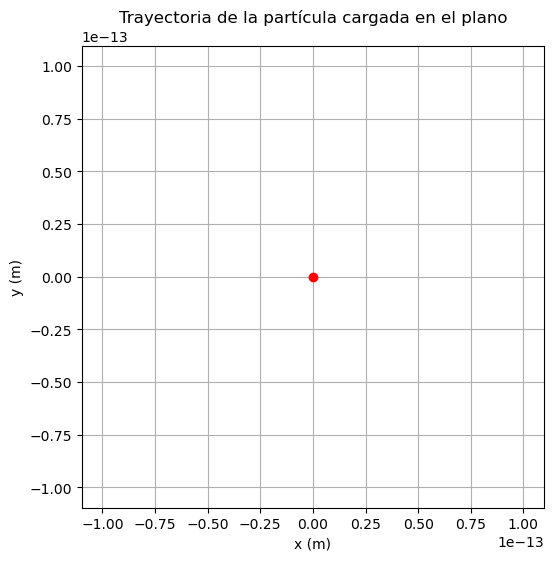

In [42]:
# Figure set up
fig,ax = plt.subplots(figsize=(6,6))
ax.set_xlim((-r_int,r_int))
ax.set_ylim((-r_int,r_int))
ax.plot([0.0],[0.0],'ro')
ax.set_aspect(aspect=1.0)

ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title('Trayectoria de la partícula cargada en el plano')
plt.grid()
plt.show()

#for b in np.linspace(-v_int,v_int,l):
#    rv = collide(b)
#    rv = np.array(rv)
#    ax.plot(rv[:,0],rv[:,1],'b')

rv = collide(1e-11)
rv = np.array(rv)
ax.plot(rv[:,0],rv[:,1],'b')

In [44]:
rv=pd.DataFrame(rv)
rv

,0,1
0,1.000000e-11,-1.097246e-13
1,1.000000e-11,-1.087246e-13
2,1.000000e-11,-1.077246e-13
3,1.000000e-11,-1.067246e-13
4,1.000000e-11,-1.057246e-13
...,...,...
215,1.000001e-11,1.052754e-13
216,1.000001e-11,1.062754e-13
217,1.000001e-11,1.072754e-13
218,1.000001e-11,1.082754e-13


In [ ]:
# ... [código anterior] ...

# Figura set up
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim((-1e-12, 1e-12))
ax.set_ylim((-1e-12, 1e-12))
ax.plot([0.0], [0.0], 'ro')
ax.set_aspect(aspect=1.0)

# Crear un colormap
cmap = plt.get_cmap('hsv')  # Puedes elegir otros mapas de colores
angles = []

# Simulación y coloración
for b in np.linspace(-3e-13, 4.0e-13, 20):
    rv = collide(b)
    rv = np.array(rv)
    ax.plot(rv[:, 0], rv[:, 2], 'b')

    # Calcular el ángulo de desviación
    final_pos = rv[-1]  # Posición final de la partícula
    angle = np.arctan2(final_pos[0], final_pos[2])  # Ángulo en radianes
    angle_deg = np.degrees(angle)  # Convertir a grados
    angles.append(angle_deg)

    # Asignar color según el ángulo
    color_index = int((angle_deg + 180) / 360 * (cmap.N - 1))  # Normaliza el ángulo
    color = cmap(color_index)
    ax.plot(rv[:, 0], rv[:, 2], color=color)

# Crear la barra de colores
norm = plt.Normalize(-180, 180)  # Normalizar ángulos entre -180 y 180
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Para evitar advertencias

# Agregar la barra de colores
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Ángulo de desviación (grados)')

plt.savefig("trayectorias_deviacion.png", dpi=300, bbox_inches='tight')  # Ajusta el nombre y formato según sea necesario

plt.show()


In [ ]:
## ángulo Respecto a eje z

# ... [código anterior] ...

# Figura set up
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim((-1e-12, 1e-12))
ax.set_ylim((-1e-12, 1e-12))
ax.plot([0.0], [0.0], 'ro')
ax.set_aspect(aspect=1.0)

# Crear un colormap
cmap = plt.get_cmap('hsv')  # Puedes elegir otros mapas de colores
angles = []

# Simulación y coloración
for b in np.linspace(-3e-13, 4.0e-13, l):
    rv = collide(b)
    rv = np.array(rv)

    # Calcular el ángulo de desviación respecto a z
    final_pos = rv[-1]  # Posición final de la partícula
    angle = np.arctan2(final_pos[0], final_pos[2])  # Ángulo respecto al eje z
    angle_deg = np.degrees(angle)  # Convertir a grados
    angles.append(angle_deg)  # Guardar el ángulo original

    # Asignar color según el ángulo
    color_index = int((angle_deg + 90) / 180 * (cmap.N - 1))  # Normaliza el ángulo
    color = cmap(color_index)
    ax.plot(rv[:, 0], rv[:, 2], color=color)

# Crear la barra de colores
norm = plt.Normalize(-90, 90)  # Normalizar ángulos entre -90 y 90
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Para evitar advertencias

# Agregar la barra de colores
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Ángulo de desviación (grados)')

plt.show()


In [ ]:
# ... [código anterior] ...

# Figura set up
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim((-1e-12, 1e-12))
ax.set_ylim((-1e-12, 1e-12))
ax.plot([0.0], [0.0], 'ro')
ax.set_aspect(aspect=1.0)

# Crear un colormap
cmap = plt.get_cmap('hsv')  # Puedes elegir otros mapas de colores
angles = []

# Simulación y coloración
for b in np.linspace(-3e-13, 4.0e-13, 9):
    rv = collide(b)
    rv = np.array(rv)

    # Calcular el ángulo de desviación
    final_pos = rv[-1]  # Posición final de la partícula
    angle = np.arctan2(final_pos[2], final_pos[0])  # Ángulo en radianes
    angle_deg = np.degrees(angle)  # Convertir a grados
    angle_abs = abs(angle_deg)  # Valor absoluto del ángulo
    angles.append(angle_abs)

    # Asignar color según el ángulo absoluto
    color_index = int((angle_abs) / 180 * (cmap.N - 1))  # Normaliza el ángulo absoluto
    color = cmap(color_index)
    ax.plot(rv[:, 0], rv[:, 2], color=color)

# Crear la barra de colores
norm = plt.Normalize(0, 180)  # Normalizar ángulos absolutos entre 0 y 180
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Para evitar advertencias

# Agregar la barra de colores
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Ángulo de desviación (grados)')

plt.show()


In [ ]:
# ... [código anterior] ...

# Figura set up
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim((-1e-12, 1e-12))
ax.set_ylim((-1e-12, 1e-12))
ax.plot([0.0], [0.0], 'ro')
ax.set_aspect(aspect=1.0)

# Crear un colormap
cmap = plt.get_cmap('hsv')  # Puedes elegir otros mapas de colores
angles = []

# Simulación y coloración
for b in np.linspace(-3e-13, 4.0e-13, 9):
    rv = collide(b)
    rv = np.array(rv)

    # Calcular el ángulo de desviación respecto a z
    final_pos = rv[-1]  # Posición final de la partícula
    angle = np.arctan2(final_pos[0], final_pos[2])  # Ángulo respecto al eje z
    angle_deg = np.degrees(angle)  # Convertir a grados
    angle_abs = abs(angle_deg)  # Valor absoluto del ángulo
    angles.append(angle_abs)

    # Asignar color según el ángulo absoluto
    color_index = int((angle_abs + 90) / 180 * (cmap.N - 1))  # Normaliza el ángulo absoluto
    color = cmap(color_index)
    ax.plot(rv[:, 0], rv[:, 2], color=color)

# Crear la barra de colores
norm = plt.Normalize(0, 90)  # Normalizar ángulos absolutos entre 0 y 90
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Para evitar advertencias

# Agregar la barra de colores
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Ángulo de desviación (grados)')

plt.show()
